In [7]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import getpass
pd.set_option('display.max_columns', None)

desired_username = 'felixlavallee-morissette'
current_username = getpass.getuser()

if current_username == desired_username:
    directory_path = '/Users/felixlavallee-morissette/Documents/GitHub/ISYE-7406-QCF/'
    os.chdir(directory_path)
    print(f"Directory changed to {directory_path}")
else:
    print("This is not Felix's computer. Directory change not executed.")

This is not Felix's computer. Directory change not executed.


### import wind_farm_1_signal_training and correctly format

In [11]:
wind_farm_1_signal_training_file_path = 'wind-farm-1-signals-training.csv'
wind_farm_1_signal_training_df = pd.read_csv(wind_farm_1_signal_training_file_path, delimiter=';')
wind_farm_1_signal_training_df['Timestamp'] = pd.to_datetime(wind_farm_1_signal_training_df['Timestamp'])
wind_farm_1_signal_training_df['Turbine_ID'] = wind_farm_1_signal_training_df['Turbine_ID'].str.replace('T', '').astype(int)

In [12]:
attributes_matrix = [
    ['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg'],
    ['Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 
         'Gen_Bear2_Temp_Avg', 'Hyd_Oil_Temp_Avg', 'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg', 'Amb_Temp_Avg', 
         'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg', 'HVTrafo_Phase3_Temp_Avg'],
    ['Grd_InverterPhase1_Temp_Avg', 'Grd_RtrInvPhase1_Temp_Avg', 'Grd_RtrInvPhase2_Temp_Avg', 
         'Grd_RtrInvPhase3_Temp_Avg', 'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 
         'Cont_VCP_Temp_Avg', 'Cont_VCP_ChokcoilTemp_Avg', 'Cont_VCP_WtrTemp_Avg', 'Grd_Busbar_Temp_Avg'],
    ['Nac_Direction_Avg', 'Amb_WindDir_Abs_Avg'],
    ['Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg'],
    ['Amb_WindSpeed_Max', 'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg'],
    ['Amb_WindDir_Relative_Avg'], 
    ['Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1', 'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1', 'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr'],

    ['Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg'],
    ['Blds_PitchAngle_Min', 'Blds_PitchAngle_Max', 'Blds_PitchAngle_Avg'],
    ['Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Max', 'Grd_Prod_Pwr_Min'],
    ['Grd_Prod_CosPhi_Avg', 'Grd_Prod_Freq_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg', 'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_CurPhse1_Avg', 'Grd_Prod_CurPhse2_Avg', 'Grd_Prod_CurPhse3_Avg'],
    ['Grd_Prod_ReactPwr_Avg', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Min'],
    ['Grd_Prod_PsblePwr_Avg', 'Grd_Prod_PsblePwr_Max', 'Grd_Prod_PsblePwr_Min'],
    ['Grd_Prod_PsbleInd_Avg', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_PsbleInd_Min'],
    ['Grd_Prod_PsbleCap_Avg', 'Grd_Prod_PsbleCap_Max', 'Grd_Prod_PsbleCap_Min']
]

In [13]:
wind_farm_1_signal_training_df

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0               11 2016-01-01 00:00:00+00:00       1339.4       1233.3   
1                6 2016-01-01 00:00:00+00:00       1270.0       1232.8   
2                1 2016-01-01 00:00:00+00:00       1277.4       1226.1   
3                9 2016-01-01 00:00:00+00:00       1376.7       1234.3   
4                7 2016-01-01 00:00:00+00:00       1317.5       1229.5   
...            ...                       ...          ...          ...   
434140          11 2017-09-01 00:00:00+00:00       1266.3       1234.3   
434141           9 2017-09-01 00:00:00+00:00       1268.4       1240.1   
434142           6 2017-09-01 00:00:00+00:00       1284.2       1233.4   
434143           1 2017-09-01 00:00:00+00:00       1299.0       1222.1   
434144           7 2017-09-01 00:00:00+00:00       1292.0       1232.5   

        Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0            1270.9         18.8               42.0                   59   
1            1248.5          6.8               42.0                   51   
2            1249.0          9.0               41.0                   58   
3            1272.0         24.7               40.0                   58   
4            1254.9         13.8               41.0                   62   
...             ...          ...                ...                  ...   
434140       1250.6          5.1               46.0                   60   
434141       1251.9          6.0               44.0                   62   
434142       1252.4          8.8               49.0                   63   
434143       1255.3         12.4               45.0                   64   
434144       1251.9          9.6               48.0                   66   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
0                        61                   60                30   
1                        52                   53                30   
2                        59                   58                30   
3                        57                   58                44   
4                        62                   61                32   
...                     ...                  ...               ...   
434140                   61                   61                39   
434141                   61                   62                51   
434142                   64                   65                40   
434143                   64                   64                39   
434144                   67                   66                40   

        Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
0                      48                  55            27         11.9   
1                      43                  48            29         11.2   
2                      44                  48            28         11.3   
3                      43                  48            29         12.2   
4                      45                  49            27         11.7   
...                   ...                 ...           ...          ...   
434140                 51                  56            31         11.2   
434141                 48                  52            35         11.2   
434142                 51                  54            37         11.4   
434143                 49                  53            34         11.4   
434144                 50                  53            33         11.4   

        Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
0              10.9         11.3                8.6                2.6   
1              10.9         11.1                6.0                1.6   
2              10.9         11.1               11.6                0.5   
3              10.9         11.2                9.9                1.8   
4              10.9         11.1               14.4                0.9   
...     

### Remove NaNs in wind_farm_1_signal_training by forward filling

In [17]:
# Find rows with NaN values
rows_with_nans = wind_farm_1_signal_training_df[wind_farm_1_signal_training_df.isna().any(axis=1)]

In [18]:
import numpy as np
# Find columns with NaN values
X_df = wind_farm_1_signal_training_df
# Sort the DataFrame by 'Timestamp' for each 'Turbine_ID'
X_df.sort_values(by=['Turbine_ID', 'Timestamp'], inplace=True)

# Fill NaN values with the previous non-NaN value within each group
X_df_filled = X_df.groupby('Turbine_ID').apply(lambda group: group.ffill())
print(np.shape(X_df), np.shape(X_df_filled))
wind_farm_1_signal_training_df = X_df_filled.reset_index(drop=True)

(434145, 83) (434145, 83)


In [19]:
rows_with_nans = wind_farm_1_signal_training_df[wind_farm_1_signal_training_df.isna().any(axis=1)]

In [20]:
wind_farm_1_signal_training_df

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0                1 2016-01-01 00:00:00+00:00       1277.4       1226.1   
1                1 2016-01-01 00:10:00+00:00       1268.3         93.3   
2                1 2016-01-01 00:20:00+00:00       1394.4        220.3   
3                1 2016-01-01 00:30:00+00:00       1306.6       1212.4   
4                1 2016-01-01 00:40:00+00:00       1320.9       1224.1   
...            ...                       ...          ...          ...   
434140          11 2017-08-31 23:20:00+00:00       1434.3       1243.1   
434141          11 2017-08-31 23:30:00+00:00       1265.2       1238.6   
434142          11 2017-08-31 23:40:00+00:00       1264.6       1235.1   
434143          11 2017-08-31 23:50:00+00:00       1281.4       1231.9   
434144          11 2017-09-01 00:00:00+00:00       1266.3       1234.3   

        Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0            1249.0          9.0               41.0                   58   
1             999.7        435.9               41.0                   58   
2             774.0        486.1               41.0                   57   
3            1257.1         17.0               40.0                   56   
4            1257.7         18.0               40.0                   57   
...             ...          ...                ...                  ...   
434140       1286.1         46.8               43.0                   56   
434141       1249.8          4.1               43.0                   57   
434142       1248.8          4.7               44.0                   58   
434143       1250.5          6.3               45.0                   59   
434144       1250.6          5.1               46.0                   60   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
0                        59                   58                30   
1                        59                   59                30   
2                        57                   57                30   
3                        57                   57                30   
4                        58                   57                30   
...                     ...                  ...               ...   
434140                   57                   56                40   
434141                   58                   58                40   
434142                   59                   59                40   
434143                   60                   60                40   
434144                   61                   61                39   

        Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
0                      44                  48            28         11.3   
1                      44                  48            28         11.2   
2                      43                  46            29         12.3   
3                      44                  48            28         11.5   
4                      44                  48            28         11.7   
...                   ...                 ...           ...          ...   
434140                 51                  57            31         12.7   
434141                 51                  56            31         11.2   
434142                 50                  55            31         11.2   
434143                 50                  55            31         11.4   
434144                 51                  56            31         11.2   

        Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
0              10.9         11.1               11.6                0.5   
1               0.0          8.8               12.5                0.4   
2               1.9          6.8                8.8                0.7   
3              10.7         11.1                9.9                0.7   
4              10.8         11.1                9.9                0.8   
...     

### import wind_farm_1_signal_testing and correctly format

In [21]:
wind_farm_1_signal_testing_file_path = 'wind-farm-1-signals-testing.csv'
wind_farm_1_signal_testing_df = pd.read_csv(wind_farm_1_signal_testing_file_path, delimiter=';')
wind_farm_1_signal_testing_df['Timestamp'] = pd.to_datetime(wind_farm_1_signal_testing_df['Timestamp'])

In [22]:
wind_farm_1_signal_testing_df

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0            T09 2017-09-01 00:10:00+00:00       1383.0       1229.1   
1            T07 2017-09-01 00:10:00+00:00       1480.4       1214.6   
2            T01 2017-09-01 00:10:00+00:00       1489.5       1228.0   
3            T11 2017-09-01 00:10:00+00:00       1318.3       1241.5   
4            T06 2017-09-01 00:10:00+00:00       1392.0       1229.5   
...          ...                       ...          ...          ...   
87634        T11 2017-12-31 23:50:00+00:00       1320.5       1216.8   
87635        T07 2017-12-31 23:50:00+00:00       1329.9       1193.0   
87636        T01 2017-12-31 23:50:00+00:00       1273.1       1239.8   
87637        T09 2017-12-31 23:50:00+00:00       1258.3       1239.7   
87638        T06 2017-12-31 23:50:00+00:00       1270.8       1229.6   

       Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0           1261.6         27.5               44.0                   64   
1           1261.9         37.4               48.0                   67   
2           1309.3         68.7               45.0                   65   
3           1254.7         11.0               46.0                   61   
4           1262.9         25.7               49.0                   63   
...            ...          ...                ...                  ...   
87634       1262.0         20.6               42.0                   56   
87635       1257.6         18.9               38.0                   61   
87636       1250.7          4.7               39.0                   59   
87637       1249.5          3.1               39.0                   60   
87638       1249.4          6.6               42.0                   56   

       Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
0                       63                   64                51   
1                       67                   66                40   
2                       65                   65                39   
3                       62                   62                39   
4                       65                   65                40   
...                    ...                  ...               ...   
87634                   58                   57                28   
87635                   61                   61                30   
87636                   59                   59                26   
87637                   58                   60                45   
87638                   58                   58                28   

       Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
0                     48                  53            35         12.2   
1                     50                  53            33         13.1   
2                     50                  53            33         13.2   
3                     51                  57            31         11.7   
4                     51                  55            35         12.3   
...                  ...                 ...           ...          ...   
87634                 50                  56            23         11.7   
87635                 49                  52            21         11.8   
87636                 49                  53            25         11.3   
87637                 46                  50            26         11.1   
87638                 49                  53            23         11.3   

       Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
0             10.9         11.1                8.4                2.6   
1             10.8         11.2                8.9                2.0   
2             10.9         11.6                9.9                2.2   
3             11.0         11.1                8.3                3.2   
4             10.9         11.2                8.6                3.4   
...            ...          ...                ...                ...   

### TO BE DONE: FFill Nans

### import wind_farm_1_metmast_training and correctly format

In [36]:
wind_farm_1_metmast_training_file_path = 'wind-farm-1-metmast-training.csv'
wind_farm_1_metmast_training_df = pd.read_csv(wind_farm_1_metmast_training_file_path, delimiter=';')
wind_farm_1_metmast_training_df['Timestamp'] = pd.to_datetime(wind_farm_1_metmast_training_df['Timestamp'])

In [37]:
wind_farm_1_metmast_training_df

Timestamp  Min_Windspeed1  Max_Windspeed1  \
0     2016-01-01 00:00:00+00:00             3.7             6.0   
1     2016-01-01 00:10:00+00:00             4.1             6.0   
2     2016-01-01 00:20:00+00:00             4.5             6.7   
3     2016-01-01 00:30:00+00:00             5.1             7.0   
4     2016-01-01 00:40:00+00:00             4.7             7.3   
...                         ...             ...             ...   
69956 2017-08-31 23:20:00+00:00             2.7             6.1   
69957 2017-08-31 23:30:00+00:00             3.3             6.1   
69958 2017-08-31 23:40:00+00:00             2.6             6.0   
69959 2017-08-31 23:50:00+00:00             3.3             6.9   
69960 2017-09-01 00:00:00+00:00             4.2             7.6   

       Avg_Windspeed1  Var_Windspeed1  Min_Windspeed2  Max_Windspeed2  \
0                 5.1            0.21             3.8             6.0   
1                 5.1            0.09             4.1             6.0   
2                 5.7            0.26             4.4             6.8   
3                 6.3            0.11             5.1             7.1   
4                 6.2            0.27             4.9             7.4   
...               ...             ...             ...             ...   
69956             4.4            0.40             2.8             6.3   
69957             4.7            0.45             3.4             5.6   
69958             4.0            0.94             2.7             5.2   
69959             5.4            0.61             3.4             6.5   
69960             6.2            0.27             4.6             6.7   

       Avg_Windspeed2  Var_Windspeed2  Min_Winddirection2  Max_Winddirection2  \
0                 5.1            0.22               236.0                 236   
1                 5.2            0.10               236.0                 236   
2                 5.8            0.30               236.0                 236   
3                 6.4            0.12               236.0                 236   
4                 6.3            0.27               236.0                 236   
...               ...             ...                 ...                 ...   
69956             4.4            0.40               115.0                 167   
69957             4.6            0.30               116.0                 169   
69958             3.8            0.51               110.0                 144   
69959             5.1            0.45                97.0                 162   
69960             5.6            0.16               104.0                 140   

       Avg_Winddirection2  Var_Winddirection2  Min_AmbientTemp  \
0                   236.0                 0.0             16.0   
1                   236.0                 0.0             17.0   
2                   236.0                 0.0             17.0   
3                   236.0                 0.0             17.0   
4                   236.0                 0.0             17.0   
...                   ...                 ...              ...   
69956               129.0               104.0             25.0   
69957               125.0                68.0             25.0   
69958               126.0                74.0             25.0   
69959               122.0                43.0             25.0   
69960               121.0                34.0             25.0   

       Max_AmbientTemp  Avg_AmbientTemp  Min_Pressure  Max_Pressure  \
0                   17             17.0        1018.0          1018   
1                   18             17.0        1018.0          1018   
2                   17             17.0        1018.0          1018   
3                   17             17.0        1017.0          1018   
4                   18             17.0        1017.0          1018   
...                ...              ...           ...           ...   
69956               26             25.0        1007.0          1007   
69957 

## wind_farm_1_metmast_testing

In [38]:
wind_farm_1_metmast_testing_file_path = 'wind-farm-1-metmast-testing.csv'
wind_farm_1_metmast_testing_df = pd.read_csv(wind_farm_1_metmast_testing_file_path, delimiter=';')
wind_farm_1_metmast_testing_df['Timestamp'] = pd.to_datetime(wind_farm_1_metmast_testing_df['Timestamp'])

In [39]:
wind_farm_1_metmast_testing_df

Timestamp  Min_Windspeed1  Max_Windspeed1  \
0     2017-09-01 00:10:00+00:00             3.8             8.8   
1     2017-09-01 00:20:00+00:00             3.8             9.0   
2     2017-09-01 00:30:00+00:00             4.1             7.5   
3     2017-09-01 00:40:00+00:00             2.5             7.9   
4     2017-09-01 00:50:00+00:00             1.3             5.5   
...                         ...             ...             ...   
17562 2017-12-31 23:10:00+00:00             5.8             9.0   
17563 2017-12-31 23:20:00+00:00             6.0             8.8   
17564 2017-12-31 23:30:00+00:00             5.1             7.4   
17565 2017-12-31 23:40:00+00:00             5.7             7.8   
17566 2017-12-31 23:50:00+00:00             5.3             7.6   

       Avg_Windspeed1  Var_Windspeed1  Min_Windspeed2  Max_Windspeed2  \
0                 6.6            0.71             4.4             7.7   
1                 6.3            0.55             3.9             7.7   
2                 6.3            0.46             3.9             7.3   
3                 5.3            1.05             2.8             6.8   
4                 3.1            0.75             1.4             4.9   
...               ...             ...             ...             ...   
17562             7.3            0.39             5.6             9.0   
17563             7.2            0.25             5.9             8.7   
17564             6.3            0.14             5.1             7.2   
17565             6.6            0.20             5.5             7.6   
17566             6.6            0.19             5.2             7.5   

       Avg_Windspeed2  Var_Windspeed2  Min_Winddirection2  Max_Winddirection2  \
0                 6.0            0.42                88.0                 127   
1                 5.8            0.29                88.0                 151   
2                 5.8            0.26               109.0                 174   
3                 5.0            0.58               106.0                 181   
4                 3.1            0.64               107.0                 189   
...               ...             ...                 ...                 ...   
17562             7.2            0.40               325.0                 352   
17563             7.2            0.25               335.0                 352   
17564             6.2            0.13               333.0                 357   
17565             6.5            0.19               341.0                   9   
17566             6.5            0.19               341.0                   9   

       Avg_Winddirection2  Var_Winddirection2  Min_AmbientTemp  \
0                   122.0                34.0             25.0   
1                   120.0                59.0             24.0   
2                   125.0                64.0             24.0   
3                   130.0               124.0             24.0   
4                   145.0               274.0             24.0   
...                   ...                 ...              ...   
17562               346.0                40.0             15.0   
17563               348.0                11.0             15.0   
17564               346.0                 7.0             14.0   
17565               347.0                39.0             14.0   
17566               359.0                70.0             14.0   

       Max_AmbientTemp  Avg_AmbientTemp  Min_Pressure  Max_Pressure  \
0                   25             25.0        1007.0          1007   
1                   25             25.0        1007.0          1007   
2                   25             25.0        1007.0          1007   
3                   25             25.0        1007.0          1007   
4                   25             24.0        1007.0          1007   
...                ...              ...           ...           ...   
17562               16             15.0        1025.0          1025   
17563 

### miscellaneous wind_turbine_datasheet

In [40]:
import pandas as pd

wind_turbine_data = {
    "POWER": {
        "Rated power (kW)": "2000",
        "Cut-in wind speed (m/s)": "4",
        "Rated wind speed (m/s)": "12",
        "Cut-out wind speed (m/s)": "25",
        "Wind class (IEC)": "IEC II (7.5 – 8.5 m/s)"
    },
    "ROTOR": {
        "Diameter (m)": "90",
        "Swept area (m^2)": "6362",
        "Number of blades": "3",
        "Rotor speed, max (rpm)": "14.9",
        "Tip speed (m/s)": "70",
        "Power density 1 (W/m^2)": "314.4"
    },
    "GEARBOX": {
        "Type": "Planetary/spur",
        "Stages": "3"
    },
    "GENERATOR": {
        "Type": "Asynchronous",
        "Speed, max (rpm)": "2016",
        "Voltage (V)": "690",
        "Grid frequency (Hz)": "50"
    },
    "TOWER": {
        "Hub height (m)": "80",
        "Type": "Steel tube",
        "Shape": "Conical",
        "Corrosion protection": "Painted"
    },
    "POWER_CURVE": {
        "Wind speed (m/s)": [
            4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10,
            10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5,
            16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 20.5, 21,
            21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25
        ],
        "Power (W)": [
            89, 142, 204, 279, 368, 470, 594, 736, 896, 1069, 1247,
            1428, 1599, 1753, 1881, 1951, 1981, 1994, 1998, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000
        ]
    }
}

index = pd.MultiIndex.from_tuples([(category, attribute) for category, attributes in wind_turbine_data.items() for attribute in attributes.keys()], names=["Category", "Attribute"])
wind_turbine_datasheet_df = pd.DataFrame([value for attributes in wind_turbine_data.values() for value in attributes.values()], index=index, columns=["Value"])

In [41]:
wind_turbine_datasheet_df

Value
Category    Attribute                                                                  
POWER       Rated power (kW)                                                       2000
            Cut-in wind speed (m/s)                                                   4
            Rated wind speed (m/s)                                                   12
            Cut-out wind speed (m/s)                                                 25
            Wind class (IEC)                                     IEC II (7.5 – 8.5 m/s)
ROTOR       Diameter (m)                                                             90
            Swept area (m^2)                                                       6362
            Number of blades                                                          3
            Rotor speed, max (rpm)                                                 14.9
            Tip speed (m/s)                                                          70
            Power density 1 (W/m^2)                                               314.4
GEARBOX     Type                                                         Planetary/spur
            Stages                                                                    3
GENERATOR   Type                                                           Asynchronous
            Speed, max (rpm)                                                       2016
            Voltage (V)                                                             690
            Grid frequency (Hz)                                                      50
TOWER       Hub height (m)                                                           80
            Type                                                             Steel tube
            Shape                                                               Conical
            Corrosion protection                                                Painted
POWER_CURVE Wind speed (m/s)          [4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9....
            Power (W)                 [89, 142, 204, 279, 368, 470, 594, 736, 896, 1...

### import wind_farm_signals_variables and correctly format

In [42]:
wind_farm_signals_variables_data = [
    # Page 1
    ["Gen_RPM_Max", "[rpm]", "FLOAT", "Maximum generator rpm in latest average period", "Generator"],
    ["Gen_RPM_Min", "[rpm]", "FLOAT", "Minimum generator rpm in latest average period", "Generator"],
    ["Gen_RPM_Avg", "[rpm]", "FLOAT", "Average generator rpm", "Generator"],
    ["Gen_RPM_Std", "[rpm]", "FLOAT", "Std. generator rpm in latest average period", "Generator"],
    ["Gen_Bear_Temp_Avg", "[ºC]", "INT", "Average temperature in generator bearing 1 (Non-Drive End)", "Generator"],
    ["Gen_Phase1_Temp_Avg", "[ºC]", "INT", "Average temperature inside generator in stator windings phase 1", "Generator"],
    ["Gen_Phase2_Temp_Avg", "[ºC]", "INT", "Average temperature inside generator in stator windings phase 2", "Generator"],
    ["Gen_Phase3_Temp_Avg", "[ºC]", "INT", "Average temperature inside generator in stator windings phase 3", "Generator"],
    ["Hyd_Oil_Temp_Avg", "[ºC]", "INT", "Average temperature oil in hydraulic group", "Hydraulic"],
    ["Gear_Oil_Temp_Avg", "[ºC]", "INT", "Average temperature oil in gearbox", "Gearbox"],
    ["Gear_Bear_Temp_Avg", "[ºC]", "INT", "Average temperature in gearbox bearing on high speed shaft", "Gearbox"],
    ["Nac_Temp_Avg", "[ºC]", "INT", "Average temperature in nacelle", "Nacelle"],
    ["Rtr_RPM_Max", "[rpm]", "FLOAT", "Maximum rotor rpm in latest average period", "Rotor"],
    ["Rtr_RPM_Min", "[rpm]", "FLOAT", "Minimum rotor rpm in latest average period", "Rotor"],
    ["Rtr_RPM_Avg", "[rpm]", "FLOAT", "Average rotor rpm", "Rotor"],
    ["Amb_WindSpeed_Max", "[m/s]", "FLOAT", "Maximum windspeed within average timebase", "Ambient"],
    ["Amb_WindSpeed_Min", "[m/s]", "FLOAT", "Minimum windspeed within average timebase", "Ambient"],
    ["Amb_WindSpeed_Avg", "[m/s]", "FLOAT", "Average windspeed within average timebase", "Ambient"],
    ["Amb_WindSpeed_Std", "[m/s]", "FLOAT", "Std. windspeed within average timebase", "Ambient"],
    ["Amb_WindDir_Relative_Avg", "[º]", "FLOAT", "Average wind relative direction", "Ambient"],
    ["Amb_WindDir_Abs_Avg", "[º]", "FLOAT", "Average wind absolute direction", "Ambient"],
    ["Amb_Temp_Avg", "[ºC]", "INT", "Average ambient temperature", "Ambient"],
    
    # Page 2
    ["Prod_LatestAvg_ActPwrGen0", "[Wh]", "INT", "Active power - generator disconnected (yaw motor hydraulic motor etc.)", "Production"],
    ["Prod_LatestAvg_ActPwrGen1", "[Wh]", "INT", "Active power - generator connected in delta", "Production"],
    ["Prod_LatestAvg_ActPwrGen2", "[Wh]", "INT", "Active power - generator connected in star", "Production"],
    ["Prod_LatestAvg_TotActPwr", "[Wh]", "INT", "Total active power", "Production"],
    ["Prod_LatestAvg_ReactPwrGen0", "[VArh]", "INT", "Reactive power - generator disconnected (yaw motor hydraulic motor etc.)", "Production"],
    ["Prod_LatestAvg_ReactPwrGen1", "[VArh]", "INT", "Reactive power - generator connected in delta", "Production"],
    ["Prod_LatestAvg_ReactPwrGen2", "[VArh]", "INT", "Reactive power - generator connected in star", "Production"],
    ["Prod_LatestAvg_TotReactPwr", "[VArh]", "INT", "Total reactive power", "Production"],
    ["HVTrafo_Phase1_Temp_Avg", "[ºC]", "INT", "Average temperature in HV transformer phase L1", "Transformer"],
    ["HVTrafo_Phase2_Temp_Avg", "[ºC]", "INT", "Average temperature in HV transformer phase L2", "Transformer"],
    ["HVTrafo_Phase3_Temp_Avg", "[ºC]", "INT", "Average temperature in HV transformer phase L3", "Transformer"],
    ["Grd_InverterPhase1_Temp_Avg", "[ºC]", "INT", "Average temperature measured by the IGBT-driver on the grid side inverter", "Grid"],
    ["Cont_Top_Temp_Avg", "[ºC]", "INT", "Average temperature in the top nacelle controller", "Controller"],
    ["Cont_Hub_Temp_Avg", "[ºC]", "INT", "Average temperature in the hub controller", "Controller"],
    ["Cont_VCP_Temp_Avg", "[ºC]", "INT", "Average temperature on the VCP-board", "Controller"],
    ["Gen_SlipRing_Temp_Avg", "[ºC]", "INT", "Average temperature in the split ring chamber", "Generator"],
    ["Spin_Temp_Avg", "[ºC]", "INT", "Average temperature in the nose cone", "Spinner"],
    ["Blds_PitchAngle_Min", "[º]", "FLOAT", "Maximum angle in latest average period", "Blades"],
    ["Blds_PitchAngle_Max", "[º]", "FLOAT", "Minimum angle in latest average period", "Blades"],
    ["Blds_PitchAngle_Avg", "[º]", "FLOAT", "Average angle", "Blades"],
    ["Blds_PitchAngle_Std", "[º]", "FLOAT", "Std. angle in latest average period", "Blades"],
    ["Cont_VCP_ChokcoilTemp_Avg", "[ºC]", "INT", "Average temperature in the choke coils on the VCS-section", "Controller"],
    ["Grd_RtrInvPhase1_Temp_Avg", "[ºC]", "INT", "Average temperature measured by the IGBT-driver on the rotor side inverter phase1", "Grid"],
    ["Grd_RtrInvPhase2_Temp_Avg", "[ºC]", "INT", "Average temperature measured by the IGBT-driver on the rotor side inverter phase2", "Grid"],
    ["Grd_RtrInvPhase3_Temp_Avg", "[ºC]", "INT", "Average temperature measured by the IGBT-driver on the rotor side inverter phase3", "Grid"],
    ["Cont_VCP_WtrTemp_Avg", "[ºC]", "INT", "Average temperature in the VCS cooling water", "Controller"],
    ["Grd_Prod_Pwr_Avg", "[kW]", "FLOAT", "Power average according to Grid", "Grid"],
    ["Grd_Prod_CosPhi_Avg", "", "FLOAT", "Average actual phase displacement Grid", "Grid"],
    ["Grd_Prod_Freq_Avg", "[Hz]", "FLOAT", "Average frequency Grid", "Grid"],

    # Page 3
    ["Grd_Prod_VoltPhse1_Avg", "[V]", "FLOAT", "Averaged voltage in phase 1 Grid", "Grid"],
    ["Grd_Prod_VoltPhse2_Avg", "[V]", "FLOAT", "Averaged voltage in phase 2 Grid", "Grid"],
    ["Grd_Prod_VoltPhse3_Avg", "[V]", "FLOAT", "Averaged voltage in phase 3 Grid", "Grid"],
    ["Grd_Prod_CurPhse1_Avg", "[A]", "FLOAT", "Averaged current in phase 1 Grid", "Grid"],
    ["Grd_Prod_CurPhse2_Avg", "[A]", "FLOAT", "Averaged current in phase 2 Grid", "Grid"],
    ["Grd_Prod_CurPhse3_Avg", "[A]", "FLOAT", "Averaged current in phase 3 Grid", "Grid"],
    ["Grd_Prod_Pwr_Max", "[kW]", "FLOAT", "Maximum Power in latest average period Grid", "Grid"],
    ["Grd_Prod_Pwr_Min", "[kW]", "FLOAT", "Minimum Power in latest average period Grid", "Grid"],
    ["Grd_Busbar_Temp_Avg", "[ºC]", "INT", "Average temperature in the busbar section Grid", "Grid"],
    ["Rtr_RPM_Std", "[rpm]", "FLOAT", "Std. rotor rpm in latest average period Rotor", "Rotor"],
    ["Amb_WindSpeed_Est_Avg", "[m/s]", "FLOAT", "Average windspeed within average timebase Ambient", "Ambient"],
    ["Grd_Prod_Pwr_Std", "[kW]", "FLOAT", "Std. power in latest average period Grid", "Grid"],
    ["Grd_Prod_ReactPwr_Avg", "[kVAr]", "FLOAT", "Average grid reactive power Grid", "Grid"],
    ["Grd_Prod_ReactPwr_Max", "[kVAr]", "FLOAT", "Maximum grid reactive power Grid", "Grid"],
    ["Grd_Prod_ReactPwr_Min", "[kVAr]", "FLOAT", "Minimum grid reactive Power Grid", "Grid"],
    ["Grd_Prod_ReactPwr_Std", "[kVAr]", "FLOAT", "Std. Deviation grid reactive power Grid", "Grid"],
    ["Grd_Prod_PsblePwr_Avg", "[kW]", "FLOAT", "Average possible grid active power Grid", "Grid"],
    ["Grd_Prod_PsblePwr_Max", "[kW]", "FLOAT", "Maximum possible grid active power Grid", "Grid"],
    ["Grd_Prod_PsblePwr_Min", "[kW]", "FLOAT", "Minimum possible grid active power Grid", "Grid"],
    ["Grd_Prod_PsblePwr_Std", "[kW]", "FLOAT", "Std. possible grid active power Grid", "Grid"],
    ["Grd_Prod_PsbleInd_Avg", "[kVAr]", "FLOAT", "Average possible inductive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleInd_Max", "[kVAr]", "FLOAT", "Maximum possible inductive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleInd_Min", "[kVAr]", "FLOAT", "Minimum possible inductive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleInd_Std", "[kVAr]", "FLOAT", "Std. possible inductive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleCap_Avg", "[kVAr]", "FLOAT", "Average possible capacitive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleCap_Max", "[kVAr]", "FLOAT", "Maximum possible capacitive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleCap_Min", "[kVAr]", "FLOAT", "Minimum possible capacitive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleCap_Std", "[kVAr]", "FLOAT", "Std. possible capacitive reactive power Grid", "Grid"],
    ["Gen_Bear2_Temp_Avg", "[ºC]", "INT", "Average temperature in generator bearing 2 (Drive End)", "Generator"],
    ["Nac_Direction_Avg", "[º]", "FLOAT", "Average nacelle direction Nacelle", "Nacelle"]
]

columns = ["Descriptor", "Units", "Datatype", "Description", "Component"]
wind_farm_signals_variables_df = pd.DataFrame(wind_farm_signals_variables_data, columns=columns)

In [43]:
wind_farm_signals_variables_df

Descriptor   Units Datatype  \
0             Gen_RPM_Max   [rpm]    FLOAT   
1             Gen_RPM_Min   [rpm]    FLOAT   
2             Gen_RPM_Avg   [rpm]    FLOAT   
3             Gen_RPM_Std   [rpm]    FLOAT   
4       Gen_Bear_Temp_Avg    [ºC]      INT   
..                    ...     ...      ...   
76  Grd_Prod_PsbleCap_Max  [kVAr]    FLOAT   
77  Grd_Prod_PsbleCap_Min  [kVAr]    FLOAT   
78  Grd_Prod_PsbleCap_Std  [kVAr]    FLOAT   
79     Gen_Bear2_Temp_Avg    [ºC]      INT   
80      Nac_Direction_Avg     [º]    FLOAT   

                                          Description  Component  
0      Maximum generator rpm in latest average period  Generator  
1      Minimum generator rpm in latest average period  Generator  
2                               Average generator rpm  Generator  
3         Std. generator rpm in latest average period  Generator  
4   Average temperature in generator bearing 1 (No...  Generator  
..                                                ...        ...  
76    Maximum possible capacitive reactive power Grid       Grid  
77    Minimum possible capacitive reactive power Grid       Grid  
78       Std. possible capacitive reactive power Grid       Grid  
79  Average temperature in generator bearing 2 (Dr...  Generator  
80                  Average nacelle direction Nacelle    Nacelle  

[81 rows x 5 columns]

### import htw_failures_training and correctly format

In [44]:
htw_failures_training_file_path = 'htw-failures-training.csv'
htw_failures_training_df = pd.read_csv(htw_failures_training_file_path)
htw_failures_training_df['Timestamp'] = pd.to_datetime(htw_failures_training_df['Timestamp'])
htw_failures_training_df['Turbine_ID'] = htw_failures_training_df['Turbine_ID'].str.replace('T', '').astype(int)

# Rounding the 'Timestamp' column to the nearest 10 minutes
htw_failures_training_df['Timestamp'] = htw_failures_training_df['Timestamp'].dt.floor('10T')
htw_failures_training_df = htw_failures_training_df[htw_failures_training_df['Component'].isin(['GEARBOX', 'HYDRAULIC_GROUP'])]

In [45]:
htw_failures_training_df

Turbine_ID        Component                 Timestamp  \
1            6  HYDRAULIC_GROUP 2016-04-04 18:50:00+00:00   
6            1          GEARBOX 2016-07-18 02:10:00+00:00   
12           9          GEARBOX 2016-10-11 08:00:00+00:00   
14          11  HYDRAULIC_GROUP 2016-10-17 17:40:00+00:00   
17          11  HYDRAULIC_GROUP 2017-04-26 18:00:00+00:00   
18           7  HYDRAULIC_GROUP 2017-06-17 11:30:00+00:00   
20           6  HYDRAULIC_GROUP 2017-08-19 09:40:00+00:00   

                                       Remarks  
1                    Error in pitch regulation  
6                         Gearbox pump damaged  
12                            Gearbox repaired  
14  Hydraulic group error in the brake circuit  
17  Hydraulic group error in the brake circuit  
18                          Oil leakage in Hub  
20                          Oil leakage in Hub

### NICHOLAS: VISUALIZATIONS

In [46]:
start_date = wind_farm_1_metmast_training_df['Timestamp'].min()
end_date = wind_farm_1_metmast_training_df['Timestamp'].max()
all_dates = pd.Series(pd.date_range(start=start_date, end=end_date, freq='10T'), name='Timestamp')
merged_df = pd.merge(all_dates, wind_farm_1_metmast_training_df, on=['Timestamp'], how='left')
merged_df['Missing_Weather'] = merged_df.isnull().any(axis=1).astype(int)
merged_df.loc[merged_df['Missing_Weather'] == 1, merged_df.columns.difference(['Missing_Weather', 'Timestamp'])] = -1000

training_merged_data = pd.merge(wind_farm_1_signal_training_df, merged_df, on=['Timestamp'], how='left')

training_merged_data = pd.merge(training_merged_data, htw_failures_training_df, 
                                on=['Timestamp', 'Turbine_ID'], 
                                how='left')

In [47]:
training_merged_data[training_merged_data['Missing_Weather'] == 1]

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
12392            1 2016-03-27 03:00:00+00:00        232.2         76.4   
12393            1 2016-03-27 03:10:00+00:00        268.1        211.6   
45605            1 2016-11-14 13:00:00+00:00       1479.5       1227.2   
45606            1 2016-11-14 13:10:00+00:00       1447.6       1221.3   
52789            1 2017-01-03 10:20:00+00:00       1271.3       1236.6   
...            ...                       ...          ...          ...   
431633          11 2017-08-14 13:00:00+00:00       1798.4       1478.9   
431635          11 2017-08-14 13:20:00+00:00       1750.8       1483.2   
431636          11 2017-08-14 13:30:00+00:00       1730.0       1431.6   
433935          11 2017-08-30 13:10:00+00:00         77.3          0.0   
433949          11 2017-08-30 15:30:00+00:00       1414.4          0.0   

        Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
12392         145.2         46.0               26.0                   31   
12393         236.4         14.1               26.0                   30   
45605        1292.4         48.6               44.0                   65   
45606        1276.0         36.2               44.0                   64   
52789        1253.5          6.4               36.0                   59   
...             ...          ...                ...                  ...   
431633       1665.6         33.5               78.0                  102   
431635       1651.9         44.4               79.0                  102   
431636       1633.2         53.8               79.0                  103   
433935         14.5         16.1               28.0                   30   
433949       1082.5        380.4               33.0                   35   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
12392                    31                   30                25   
12393                    31                   30                25   
45605                    65                   65                28   
45606                    65                   64                28   
52789                    59                   59                26   
...                     ...                  ...               ...   
431633                  101                  101                46   
431635                  102                  102                47   
431636                  102                  102                47   
433935                   30                   30                36   
433949                   35                   35                39   

        Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
12392                  38                  38            24          2.0   
12393                  38                  37            24          2.4   
45605                  52                  56            29         13.1   
45606                  51                  55            30         12.8   
52789                  43                  47            26         11.3   
...                   ...                 ...           ...          ...   
431633                 55                  66            36         15.9   
431635                 55                  67            36         15.5   
431636                 55                  67            36         15.3   
433935                 37                  36            35          0.0   
433949                 40                  46            34         12.5   

        Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
12392           0.0          0.6                5.0                0.4   
12393           1.9          2.1                5.7                0.4   
45605          10.9         11.4               16.4                1.0   
45606          10.8         11.3               17.4                0.4   
52789          10.9         11.1                9.9                1.5   
...     

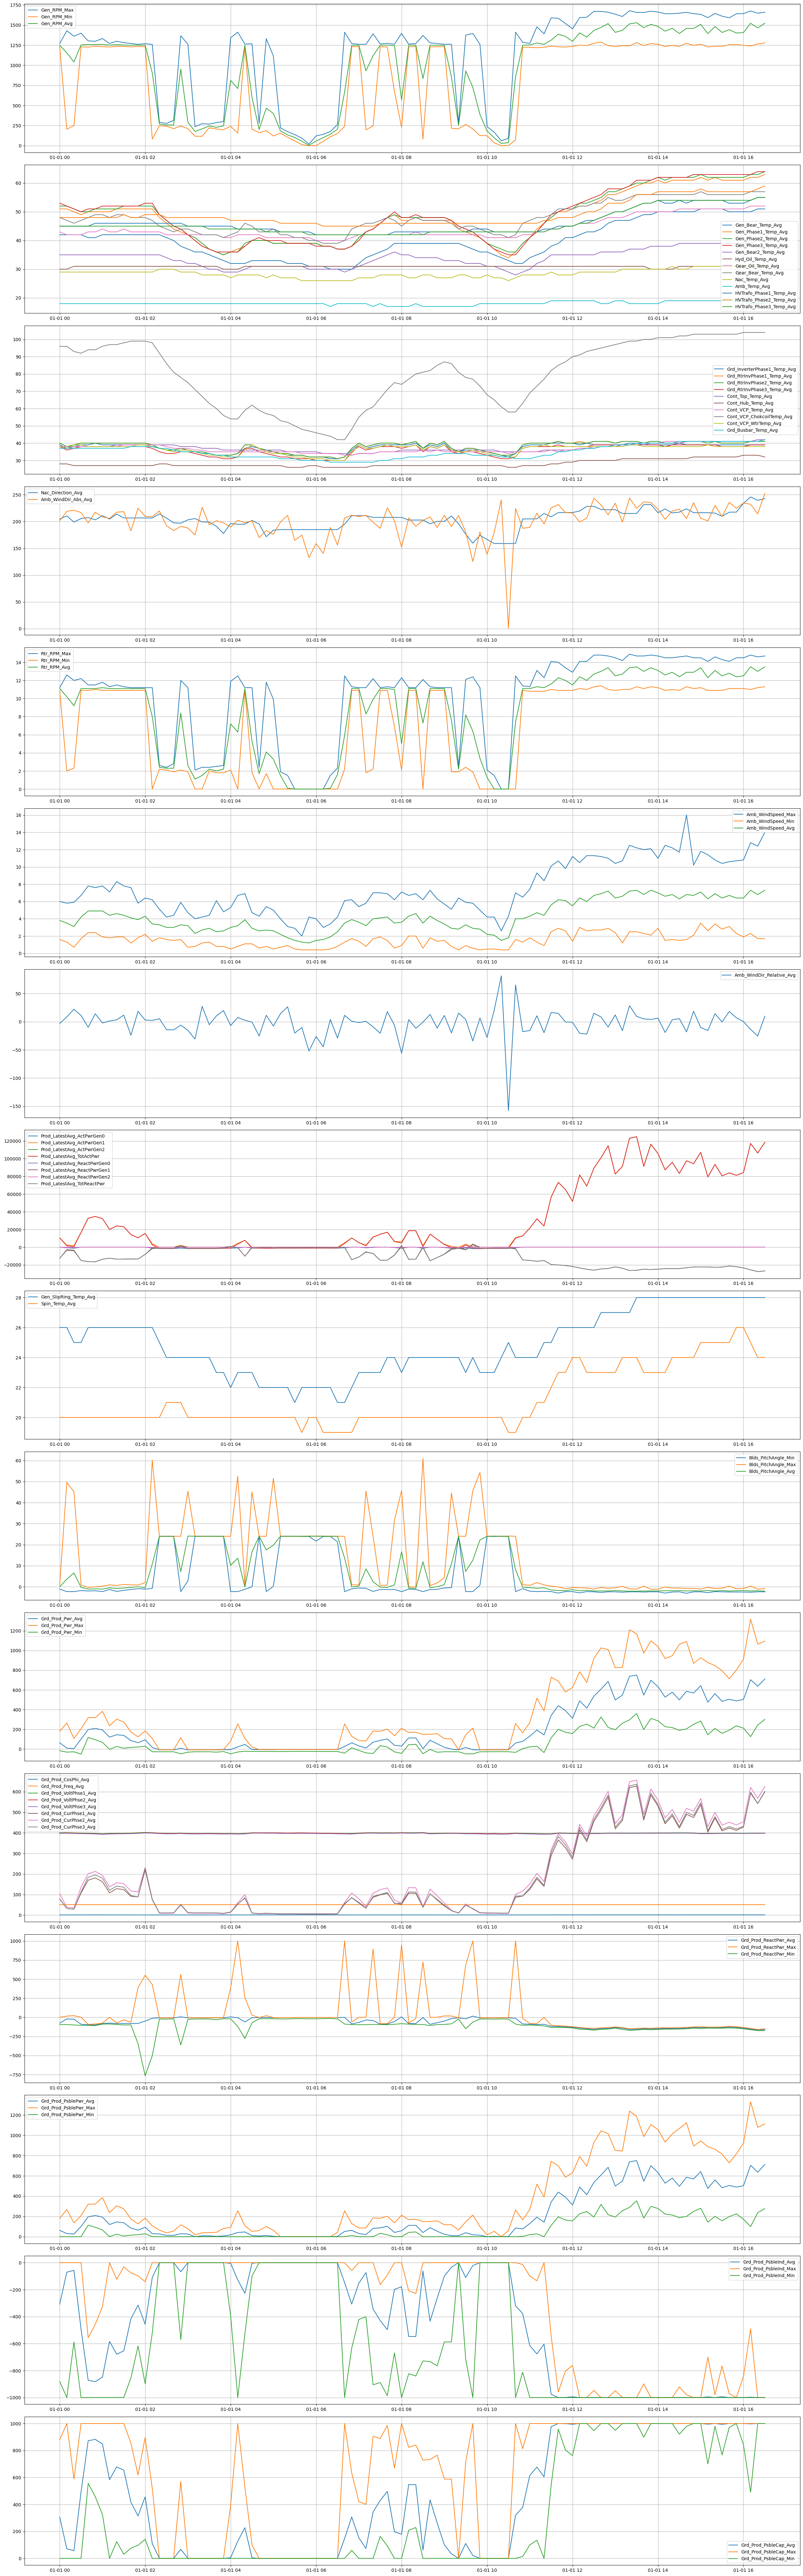

In [48]:
t01_data = wind_farm_1_signal_training_df[wind_farm_1_signal_training_df['Turbine_ID'] == 6]
total_rows = len(attributes_matrix)
fig, axes = plt.subplots(nrows=total_rows, figsize=(25, 5 * total_rows))  # Adjust figsize as needed

steps = range(0, 100)
for i, row in enumerate(attributes_matrix):
    for col in row:
        axes[i].plot(t01_data['Timestamp'].iloc[steps], t01_data[col].iloc[steps], label=col)  # Adjust range as needed

    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.savefig('plot.pdf')
plt.show()

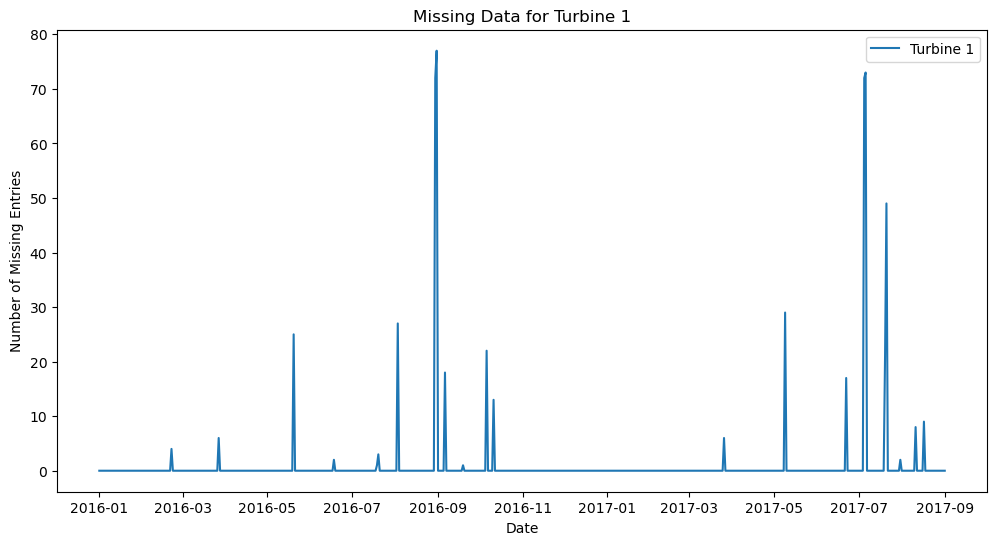

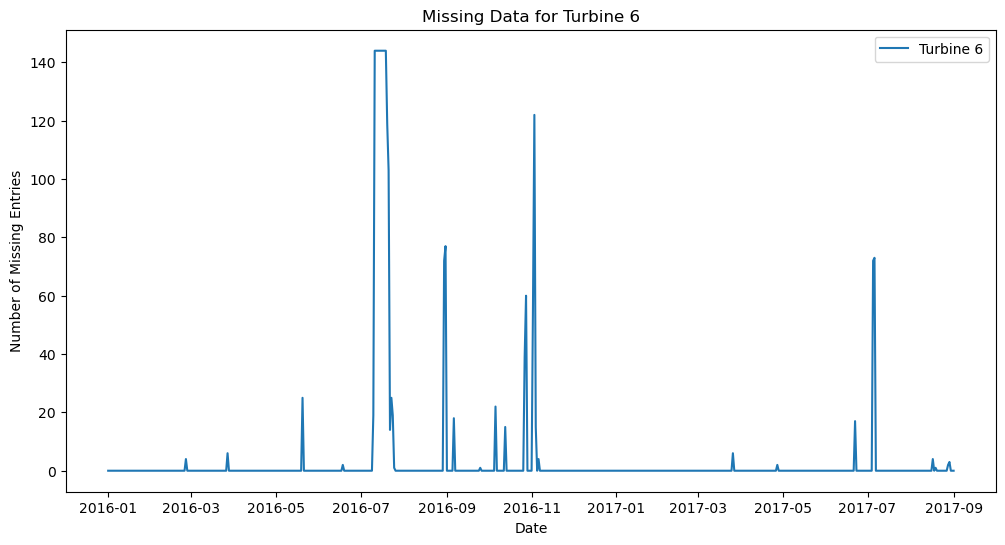

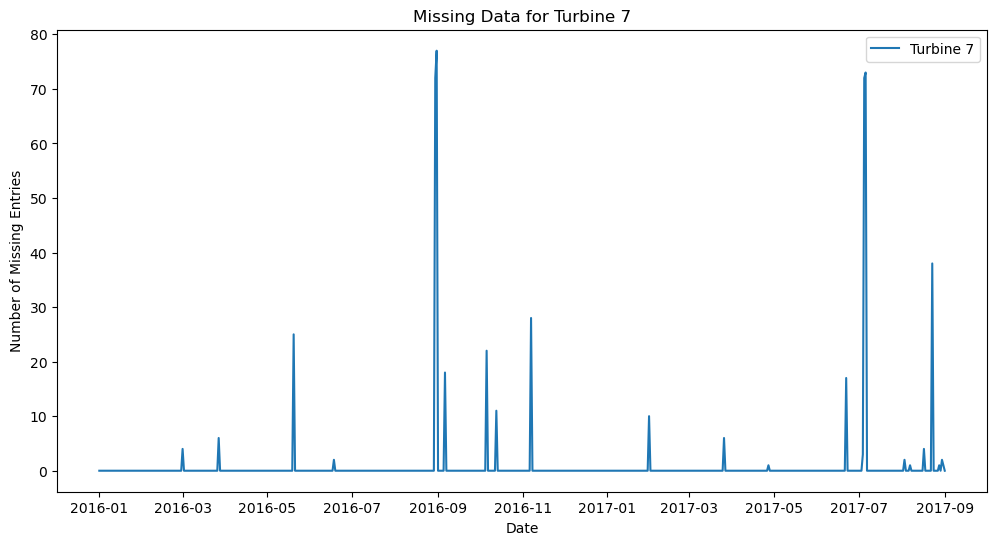

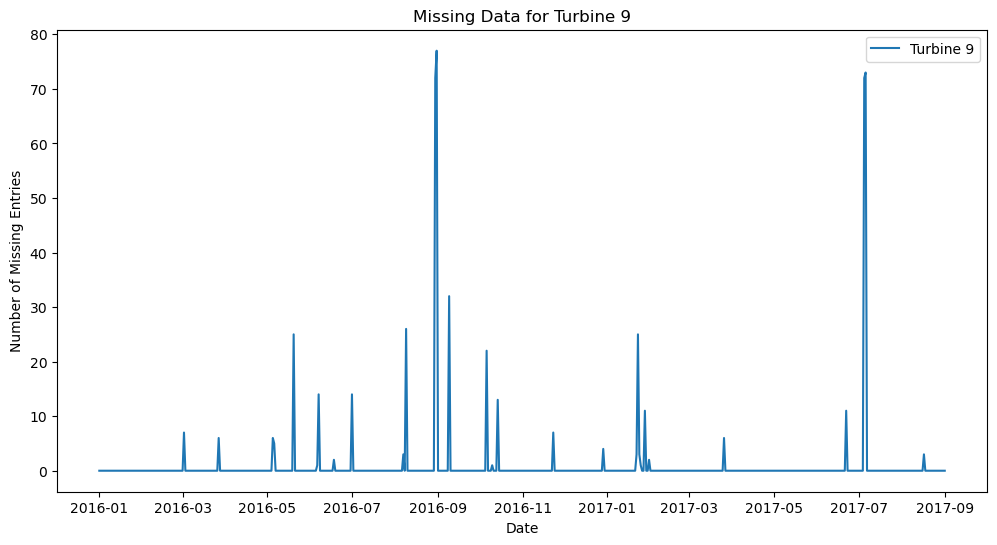

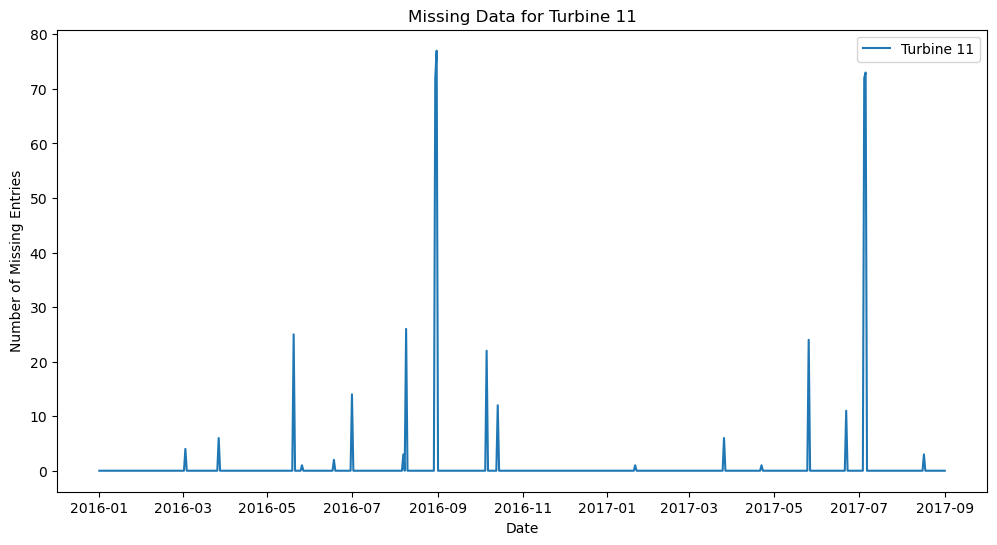

In [49]:
dummy = wind_farm_1_signal_training_df
df = dummy

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Identify Start and End Date
start_date = df['Timestamp'].min()
end_date = df['Timestamp'].max()

# 2. Create a 10-Minute Interval Time Series
all_dates = pd.date_range(start=start_date, end=end_date, freq='10T')

# Create a DataFrame with all turbine IDs and all dates
turbine_ids = df['Turbine_ID'].unique()
all_dates_df = pd.MultiIndex.from_product([turbine_ids, all_dates], names=['Turbine_ID', 'Timestamp']).to_frame(index=False)

# 3. Merge with Original Data
merged_df = pd.merge(all_dates_df, df, on=['Turbine_ID', 'Timestamp'], how='left')

merged_df['Missing'] = merged_df.isnull().any(axis=1).astype(int)

# Group by Turbine_ID and Timestamp (daily)
daily_missing = merged_df.groupby(['Turbine_ID', pd.Grouper(key='Timestamp', freq='D')])['Missing'].sum().reset_index()

# 5. Plotting
for turbine_id in turbine_ids:
    turbine_data = daily_missing[daily_missing['Turbine_ID'] == turbine_id]
    plt.figure(figsize=(12, 6))
    plt.plot(turbine_data['Timestamp'], turbine_data['Missing'], label=f'Turbine {turbine_id}')
    plt.title(f'Missing Data for Turbine {turbine_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Missing Entries')
    plt.legend()
    plt.show()

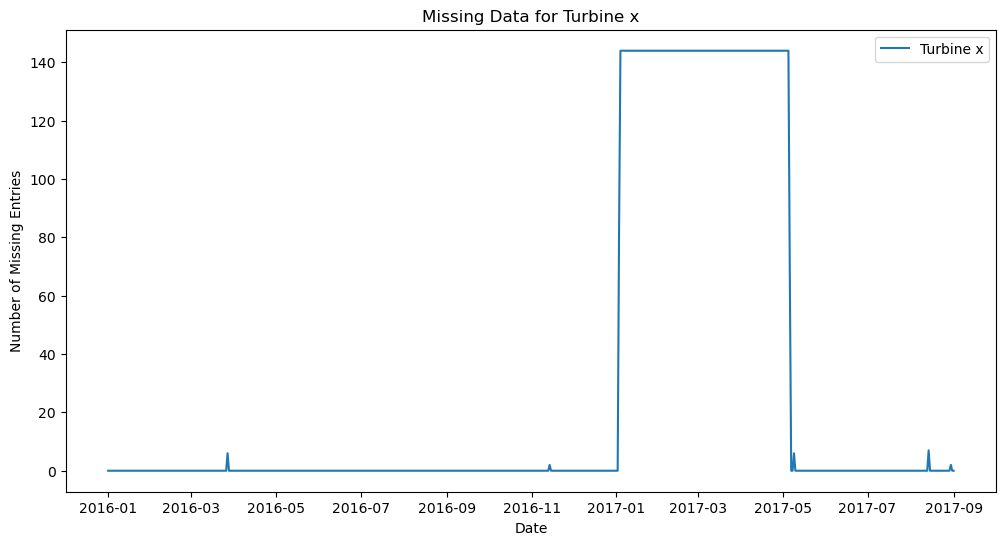

In [50]:
dummy = wind_farm_1_metmast_training_df
dummy['Turbine_ID'] = 'x'
df = dummy

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Identify Start and End Date
start_date = df['Timestamp'].min()
end_date = df['Timestamp'].max()

# 2. Create a 10-Minute Interval Time Series
all_dates = pd.date_range(start=start_date, end=end_date, freq='10T')

# Create a DataFrame with all turbine IDs and all dates
turbine_ids = df['Turbine_ID'].unique()
all_dates_df = pd.MultiIndex.from_product([turbine_ids, all_dates], names=['Turbine_ID', 'Timestamp']).to_frame(index=False)

# 3. Merge with Original Data
merged_df = pd.merge(all_dates_df, df, on=['Turbine_ID', 'Timestamp'], how='left')

merged_df['Missing'] = merged_df.isnull().any(axis=1).astype(int)

# Group by Turbine_ID and Timestamp (daily)
daily_missing = merged_df.groupby(['Turbine_ID', pd.Grouper(key='Timestamp', freq='D')])['Missing'].sum().reset_index()

# 5. Plotting
for turbine_id in turbine_ids:
    turbine_data = daily_missing[daily_missing['Turbine_ID'] == turbine_id]
    plt.figure(figsize=(12, 6))
    plt.plot(turbine_data['Timestamp'], turbine_data['Missing'], label=f'Turbine {turbine_id}')
    plt.title(f'Missing Data for Turbine {turbine_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Missing Entries')
    plt.legend()
    plt.show()

# X!

In [51]:
training_merged_data.drop(columns=['Remarks'], inplace=True)
training_merged_data['Component'] = training_merged_data['Component'].fillna('NONE')
training_merged_data['Component'] = pd.Categorical(training_merged_data['Component'])

In [52]:
X = training_merged_data.drop(columns=['Component'])
X['Timestamp'] = X['Timestamp'].astype(int) / 10**9
y = training_merged_data['Component']

In [53]:
X.values.tolist()

[[1.0,
  1451606400.0,
  1277.4,
  1226.1,
  1249.0,
  9.0,
  41.0,
  58.0,
  59.0,
  58.0,
  30.0,
  44.0,
  48.0,
  28.0,
  11.3,
  10.9,
  11.1,
  11.6,
  0.5,
  3.3,
  0.9,
  -12.4,
  206.1,
  18.0,
  -107.0,
  4420.0,
  0.0,
  4313.0,
  -99.0,
  -5636.0,
  0.0,
  -5735.0,
  68.0,
  76.0,
  65.0,
  39.0,
  39.0,
  28.0,
  43.0,
  25.0,
  20.0,
  -1.1,
  4.5,
  0.6000000000000001,
  0.9,
  91.0,
  39.0,
  39.0,
  38.0,
  39.0,
  26.2,
  0.7000000000000001,
  50.0,
  401.6,
  399.9,
  399.2,
  46.5,
  61.1,
  45.5,
  118.4,
  -33.5,
  38.0,
  0.1,
  3.6,
  35.3,
  -34.9,
  13.2,
  -100.0,
  36.2,
  29.4,
  119.3,
  0.0,
  31.9,
  -144.4,
  0.0,
  -584.5,
  157.1,
  144.4,
  584.5,
  0.0,
  157.1,
  37.0,
  218.5,
  3.7,
  6.0,
  5.1,
  0.21,
  3.8,
  6.0,
  5.1,
  0.22,
  236.0,
  236.0,
  236.0,
  0.0,
  16.0,
  17.0,
  17.0,
  1018.0,
  1018.0,
  1018.0,
  85.0,
  92.0,
  90.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0499,
  0.24,
  1.0,
  0.0,
  0.0499,
  0.24,
  1.0,
  0.0,

In [54]:
X[X['Missing_Weather'] == 1]

Turbine_ID     Timestamp  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
12392            1  1.459048e+09        232.2         76.4        145.2   
12393            1  1.459048e+09        268.1        211.6        236.4   
45605            1  1.479128e+09       1479.5       1227.2       1292.4   
45606            1  1.479129e+09       1447.6       1221.3       1276.0   
52789            1  1.483439e+09       1271.3       1236.6       1253.5   
...            ...           ...          ...          ...          ...   
431633          11  1.502716e+09       1798.4       1478.9       1665.6   
431635          11  1.502717e+09       1750.8       1483.2       1651.9   
431636          11  1.502717e+09       1730.0       1431.6       1633.2   
433935          11  1.504099e+09         77.3          0.0         14.5   
433949          11  1.504107e+09       1414.4          0.0       1082.5   

        Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
12392          46.0               26.0                   31   
12393          14.1               26.0                   30   
45605          48.6               44.0                   65   
45606          36.2               44.0                   64   
52789           6.4               36.0                   59   
...             ...                ...                  ...   
431633         33.5               78.0                  102   
431635         44.4               79.0                  102   
431636         53.8               79.0                  103   
433935         16.1               28.0                   30   
433949        380.4               33.0                   35   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
12392                    31                   30                25   
12393                    31                   30                25   
45605                    65                   65                28   
45606                    65                   64                28   
52789                    59                   59                26   
...                     ...                  ...               ...   
431633                  101                  101                46   
431635                  102                  102                47   
431636                  102                  102                47   
433935                   30                   30                36   
433949                   35                   35                39   

        Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
12392                  38                  38            24          2.0   
12393                  38                  37            24          2.4   
45605                  52                  56            29         13.1   
45606                  51                  55            30         12.8   
52789                  43                  47            26         11.3   
...                   ...                 ...           ...          ...   
431633                 55                  66            36         15.9   
431635                 55                  67            36         15.5   
431636                 55                  67            36         15.3   
433935                 37                  36            35          0.0   
433949                 40                  46            34         12.5   

        Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
12392           0.0          0.6                5.0                0.4   
12393           1.9          2.1                5.7                0.4   
45605          10.9         11.4               16.4                1.0   
45606          10.8         11.3               17.4                0.4   
52789          10.9         11.1                9.9                1.5   
...             ...          ...                ...                ...   
431633         13.1         14.7               23.0                1.2   
4316

In [55]:
y

0         NONE
1         NONE
2         NONE
3         NONE
4         NONE
          ... 
434140    NONE
434141    NONE
434142    NONE
434143    NONE
434144    NONE
Name: Component, Length: 434145, dtype: category
Categories (3, object): ['GEARBOX', 'HYDRAULIC_GROUP', 'NONE']

Random forest model

In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have your X and Y dataframes
# Let's say your X dataframe is called 'X_df' and Y dataframe is called 'Y_df'

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Get the classification report
print(classification_report(Y_test, Y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

        NONE       1.00      1.00      1.00     86829

    accuracy                           1.00     86829
   macro avg       1.00      1.00      1.00     86829
weighted avg       1.00      1.00      1.00     86829

